## measures of central tendency


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv ('C:\\Users\\91730\\Downloads\\house_price.csv')
print(data)


                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [24]:
print(data.head())
print(data.describe())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000    

In [66]:
Q1=data['price_per_sqft'].quantile(0.25)
Q3=data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['price_per_sqft'] >=Q1-1.5*IQR) & (data['price_per_sqft'] <= Q3 + 1.5*IQR)]
print(filtered_data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [27]:
mean =filtered_data['price_per_sqft'].mean()
print("mean:",mean)

mean: 5575.925513196481


In [28]:
percentiles = filtered_data['price_per_sqft'].quantile([0.25,0.5,0.75])
print("25th percentile:",percentiles[0.25])
print("50th percentile (median):",percentiles[0.5])
print("75th percentile:",percentiles[0.75])

25th percentile: 4166.0
50th percentile (median): 5188.0
75th percentile: 6603.0


In [29]:
iqr=percentiles[0.75]-percentiles[0.25]
print("IQR:",iqr)

IQR: 2437.0


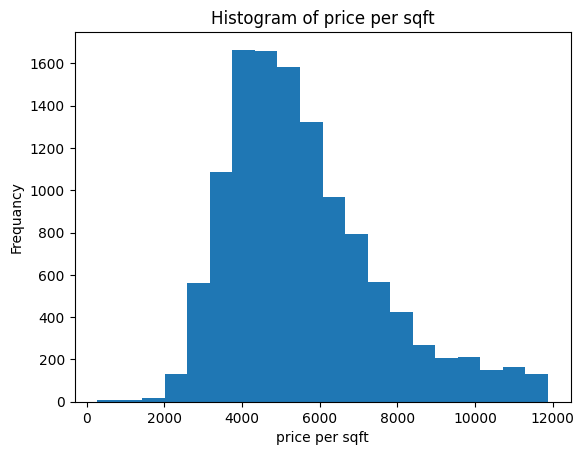

In [32]:
plt.hist(filtered_data ['price_per_sqft'],bins=20)
plt.xlabel('price per sqft')
plt.ylabel('Frequancy')
plt.title('Histogram of price per sqft')
plt.show()

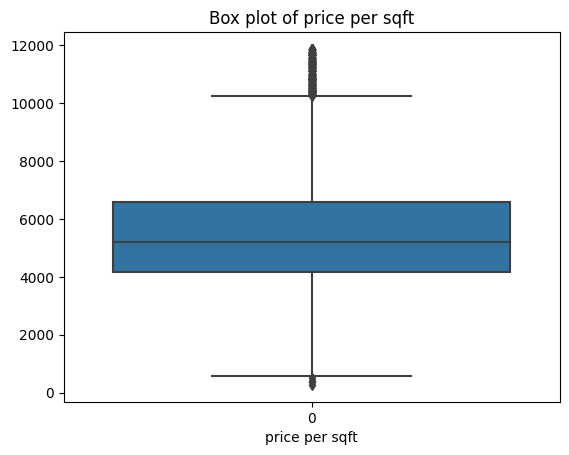

In [34]:
sns.boxplot(filtered_data['price_per_sqft'])
plt.xlabel("price per sqft")
plt.title('Box plot of price per sqft')
plt.show()

In [61]:
filtered_data.drop(['location' , 'size'],axis = 1, inplace = True)

C:\Users\91730\AppData\Local\Temp\ipykernel_20424\4093933550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['location' , 'size'],axis = 1,inplace = True)


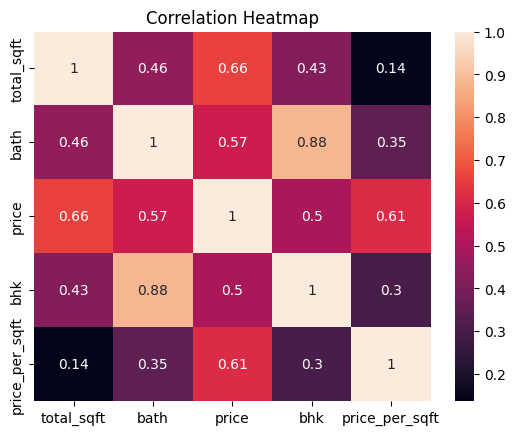

In [63]:
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()


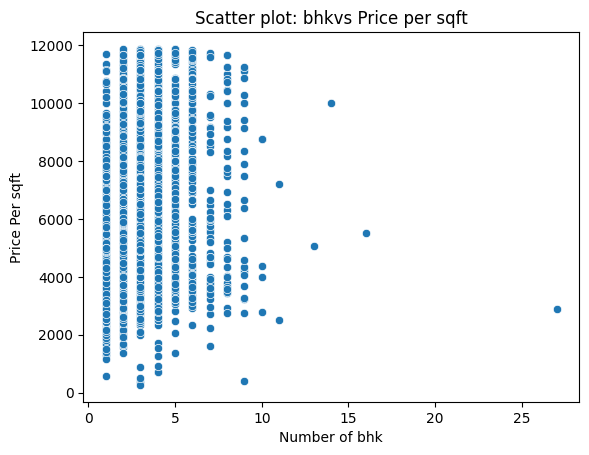

In [67]:
sns.scatterplot(x=filtered_data['bhk'],y=filtered_data['price_per_sqft'])
plt.xlabel('Number of bhk')
plt.ylabel('Price Per sqft')
plt.title('Scatter plot: bhkvs Price per sqft')
plt.show()
                